In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

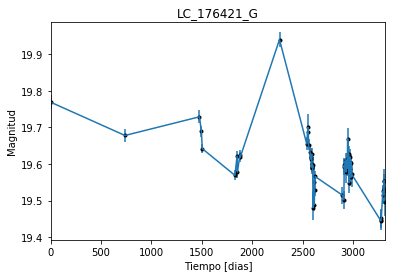

In [2]:
data = np.genfromtxt('LC_176421_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176421_G')
plt.savefig("LC_176421_G.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

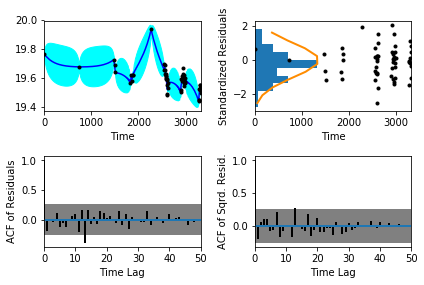

In [6]:
sample.assess_fit()

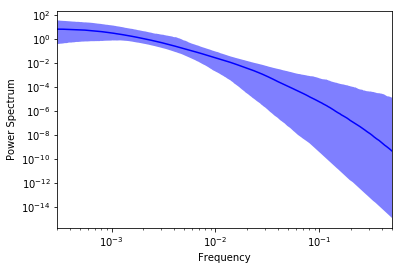

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

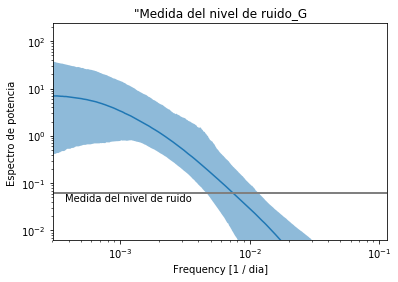

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176421_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176421_G')

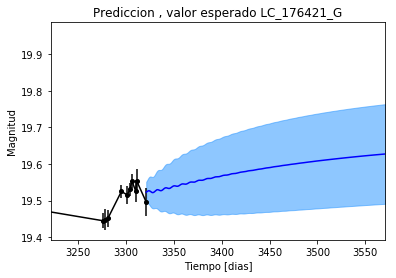

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176421_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176421_G')

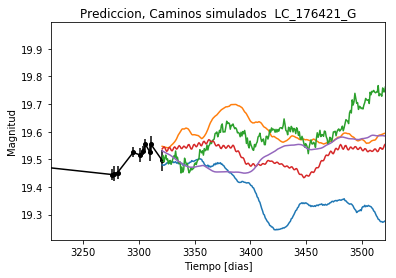

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176421_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


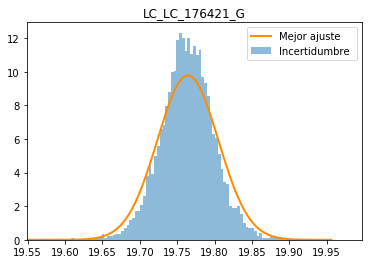

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_LC_176421_G')
plt.savefig("Mejor_ajuste_LC_176421_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176421_G')

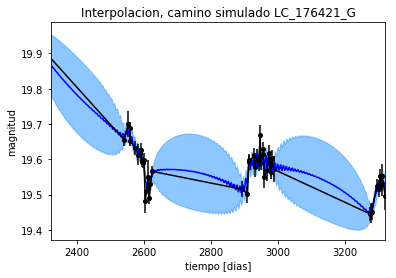

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_G')

Text(0.5,1,'Interpolacion, camino simulado LC_176421_G')

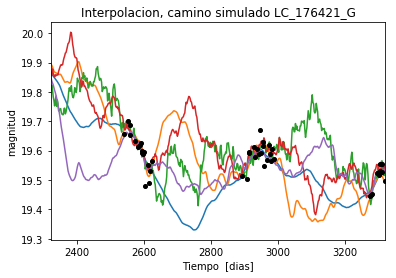

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 568.681248483
Median: 0.016663539158
Standard deviation: 0.204385428683
68% credibility interval: [ 0.00100118  0.2231759 ]
95% credibility interval: [  3.29491232e-04   7.91890766e-01]
99% credibility interval: [  3.03012872e-04   9.40335541e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 388.168441446
Median: 0.00300888565591
Standard deviation: 0.0749405781029
68% credibility interval: [ 0.00045952  0.03766448]
95% credibility interval: [ 0.00031202  0.2534183 ]
99% credibility interval: [  3.03012872e-04   4.87145927e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 589.544119392
Median: 0.0496821102613
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 763.472377973
Median: 121.327412845
Standard deviation: 1.75396303655
68% credibility interval: [ 119.47450408  122.72106917]
95% credibility interval: [ 116.94165835  123.69801011]
99% credibility interval: [ 114.70353726  124.43146307]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 543.009031764
Median: 1.12794428628
Standard deviation: 2.42845962417
68% credibility interval: [ 0.13085109  4.69889009]
95% credibility interval: [ 0.02707698  8.25669213]
99% credibility interval: [  0.01464006  10.85072976]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 444.840762962
Median: 0.940077940158
Standard deviation: 8.87568359264
68% credibility interval: [  0.04454672  10.84348192]
95% credibility interval: [  2.71664795

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0646755
Median: 9.70268680664e-17
Standard deviation: 4.26605399504e+65
68% credibility interval: [  1.01153580e-61   1.25385087e+18]
95% credibility interval: [  2.77542885e-90   3.98260447e+54]
99% credibility interval: [  1.02854392e-96   8.61265556e+61]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2792.3038346
Median: 19.6549111897
Standard deviation: 0.0674660344186
68% credibility interval: [ 19.60238581  19.71223443]
95% credibility interval: [ 19.52521869  19.79456078]
99% credibility interval: [ 19.45325129  19.86949263]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 925.411201162
Median: 0.00514091227223
Standard deviation: 0.240939645256
68% credibility interval: [ 0.          0.37128705]
95% credibility interval: [ 0.          0.87076627]
99% credibility interval: [ 0.          0.96729228]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 925.411201162
Median: 0.00514091227223
Standard deviation: 0.240939645256
68% credibility interval: [ 0.          0.37128705]
95% credibility interval: [ 0.          0.87076627]
99% credibility interval: [ 0.          0.96729228]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1430.55126216
Median: 0.0
Standard deviation: 0.000704698471333
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 763.472377973
Median: 121.327412845
Standard deviation: 1.75396303655
68% credibility interval: [ 119.47450408  122.72106917]
95% credibility interval: [ 116.94165835  123.69801011]
99% credibility interval: [ 114.70353726  124.43146307]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1575.09653661
Median: 0.0215834764764
Standard deviation: 0.0237010765339
68% credibility interval: [ 0.01325611  0.03981303]
95% credibility interval: [ 0.00891063  0.08333738]
99% credibility interval: [ 0.00703874  0.15165044]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 909.463300077
Median: 1.17078146313
Standard deviation: 0.217546856384
68% credibility interval: [ 0.97696665  1.4031431 ]
95% credibility interval: [ 0.820955    1.67305253]
99% credibility interval: [ 0.73284026  1.87258411]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 607.375784265
Median: 0.000352289997599
Standard deviation: 0.14674146251
68% credibility interval: [  8.50228488e-22   2.07399741e-02]
95% credibility interval: [  4.29144348e-58   4.12041638e-01]
99% credibility interval: [  3.60670271e-64   1.05428492e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 568.681248483
Median: (-0.104700104403-1.97281109393j)
Standard deviation: 1.98518148214
68% credibility interval: [-1.40225556+0.j         -0.00629060-4.79307273j]
95% credibility interval: [ -4.97559642e+00+0.j          -2.07025447e-03-1.16648635j]
99% credibility interval: [ -5.90830245e+00+0.j          -1.90388603e-03-0.00261053j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 388.168441446
Median: (-0.0189053861442+2.96409616257j)
Standard deviation: 1.5854059438
68% credibility interval: [-0.23665290+2.23141262j -0.00288722+0.j        ]
95% credibility interval: [-1.59227416+1.10539865j -0.00196046+0.j        ]
99% credibility interval: [ -3.06082813e+00 +3.45913157e+00j  -1.90388603e-03 +2.61053351e-03j]
Poster